In [1]:
# https://gist.github.com/jimfleming/00a8285d846fb25fe236
%matplotlib inline

from IPython.display import Image

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=2)

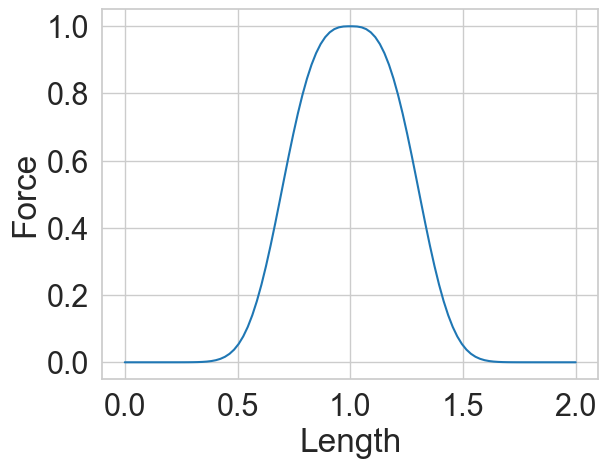

In [2]:
c = np.log(0.05)
L_CE_opt = 1.0
w = 0.5

def f_L(L_CE_norm):
    return np.exp(c * np.power(np.absolute((L_CE_norm - L_CE_opt) / (L_CE_opt * w)), 3.0))
f_L = np.vectorize(f_L)

L_CE_norm = np.linspace(0, 2, 100)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Length')
ax.set_ylabel('Force')
ax.plot(L_CE_norm, f_L(L_CE_norm))



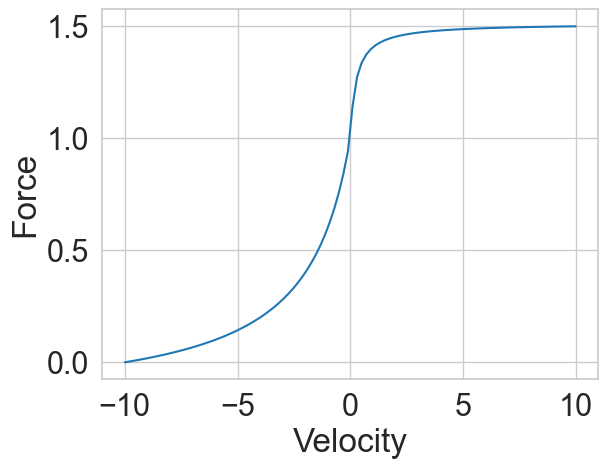

In [3]:
V_max = -10.0
K = 5.0
N = 1.5

def f_V(V_CE_norm):
    if V_CE_norm < 0:
        return (V_max - V_CE_norm) / (V_max + (K * V_CE_norm))
    else:
        return N + (N - 1) * ((V_max + V_CE_norm) / ((7.56 * K * V_CE_norm) - V_max))
f_V = np.vectorize(f_V)

V_CE_norm = np.linspace(-10, 10, 100)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Velocity')
ax.set_ylabel('Force')
ax.plot(V_CE_norm, f_V(V_CE_norm))

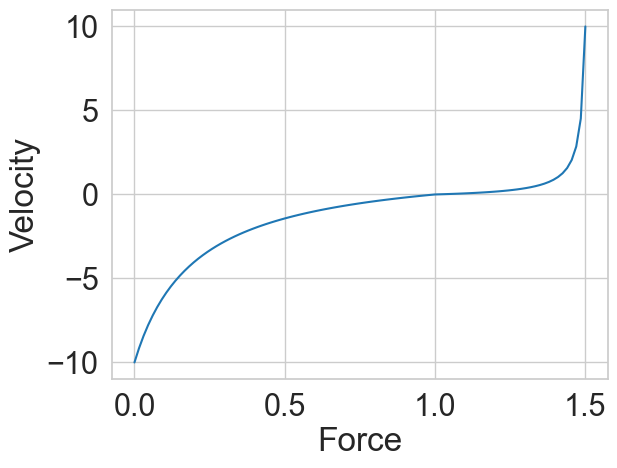

In [4]:
def f_V_inv(y):
    if y < 1:
        return (V_max * (1 - y)) / (1 + (y * K))
    else:
        return (V_max * (y - 1)) / ((7.56 * K * (y - N)) - N + 1)
f_V_inv = np.vectorize(f_V_inv)

y = np.linspace(0, 1.5, 100)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Force')
ax.set_ylabel('Velocity')
ax.plot(y, f_V_inv(y))



Text(0.5, 0, 'F_CE')

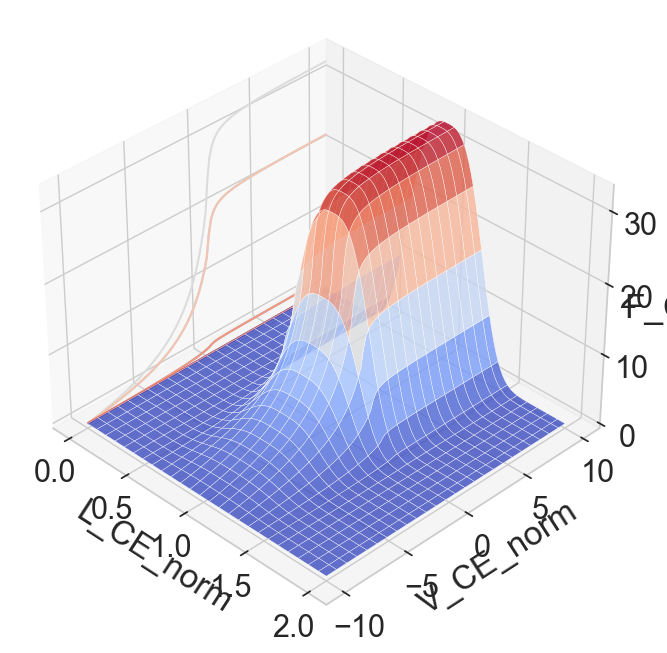

In [5]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

F_max = 22.0
a = 1.0

def f_CE(L_CE_norm, V_CE_norm):
    return a * F_max * f_L(L_CE_norm) * f_V(V_CE_norm)

L_CE_norm = np.linspace(0, 2, 100)
V_CE_norm = np.linspace(-10, 10, 100)
L_CE_norm, V_CE_norm = np.meshgrid(L_CE_norm, V_CE_norm)

f_CE = np.vectorize(f_CE)
F_CE = f_CE(L_CE_norm, V_CE_norm)

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(L_CE_norm, V_CE_norm, F_CE, rstride=4, cstride=4, alpha=0.8, linewidth=0.25, cmap=cm.coolwarm)

cset = ax.contour(L_CE_norm, V_CE_norm, F_CE, zdir='x', offset=0, cmap=cm.coolwarm)

ax.view_init(35, -45)

ax.set_xlabel('L_CE_norm')
ax.set_ylabel('V_CE_norm')
ax.set_zlabel('F_CE')

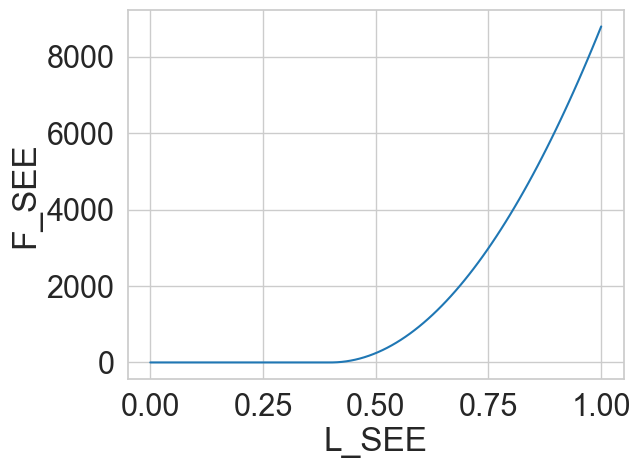

In [6]:
L_SEE_rest = 0.4
epsilon_ref = 0.04 * L_SEE_rest

def f_SEE(L_SEE):
    epsilon = (L_SEE - L_SEE_rest) / L_SEE_rest
    if epsilon > 0.0:
        return (epsilon / epsilon_ref)**2.0
    else:
        return 0.0

L_SEE = np.linspace(0, 1, 100)

f_SEE = np.vectorize(f_SEE)
F_SEE = f_SEE(L_SEE)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('L_SEE')
ax.set_ylabel('F_SEE')
ax.plot(L_SEE, F_SEE)

Text(0.5, 0, 'F_PEE')

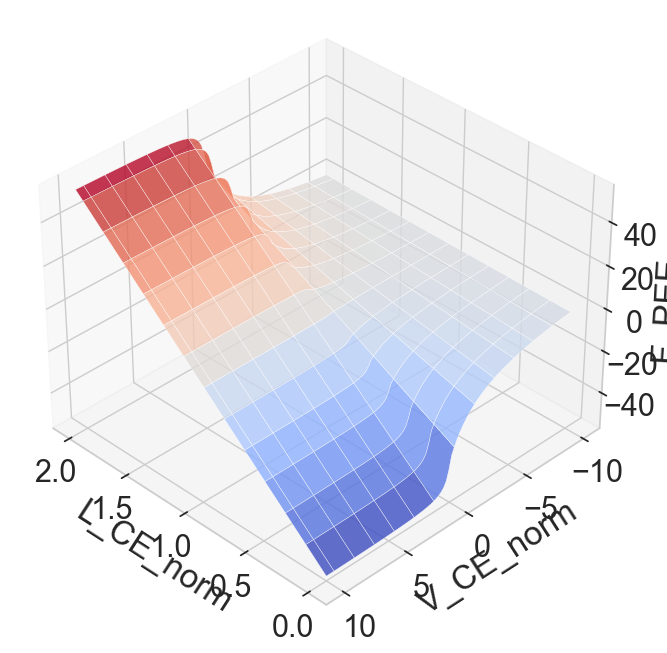

In [7]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

w = 0.6
V_max = -12.0
K = 5.0
N = 1.5

def f_PEE(L_CE_norm, V_CE_norm):
    return F_max * ((L_CE_norm - L_CE_opt) / (L_CE_opt * w)) * f_V(V_CE_norm)

L_CE_norm = np.linspace(0, 2, 100)
V_CE_norm = np.linspace(-10, 10, 100)
L_CE_norm, V_CE_norm = np.meshgrid(L_CE_norm, V_CE_norm)

f_PEE = np.vectorize(f_PEE)
F_PEE = f_PEE(L_CE_norm, V_CE_norm)

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(L_CE_norm, V_CE_norm, F_PEE, rstride=8, cstride=8, alpha=0.8, linewidth=0.25, cmap=cm.coolwarm)

ax.view_init(35, 135)

ax.set_xlabel('L_CE_norm')
ax.set_ylabel('V_CE_norm')
ax.set_zlabel('F_PEE')

Text(0, 0.5, 'a / u')

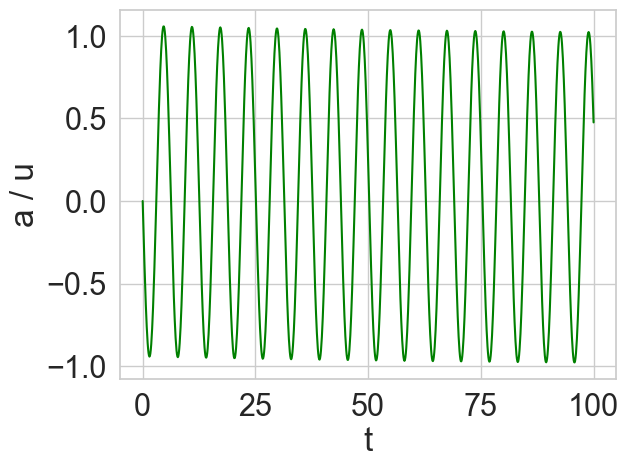

In [8]:
c_a = 0.01

def da(u, a):
    return c_a * (u - a)

t_series = np.linspace(0, 100, 1000)
u_series = np.sin(t_series - (np.pi / 2)) * 100

a_series = []
a = 0.0

prev_t = 0
for (t, u) in zip(t_series, u_series):
    dt = t - prev_t
    a += da(u, a) * dt
    prev_t = t
    a_series.append(a)


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(t_series, a_series, "g") # activation
# ax.plot(t_series, u_series, "b") # neural input
ax.set_xlabel('t')
ax.set_ylabel('a / u')